In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

This assignment will try, by employing KNN/random forest, to establish a predictive model based on a data set about speeddating. The data set contains factors that made up the final decision to 

Firstly, I wanted to see what columns were avalaible and what values they had (cat/numerical etc), to make an informed choice of which to subset.

In [2]:
df = pd.read_csv('DatingData.csv')
pd.set_option('display.max_columns', None)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

I choose 7 values that, in my opinion, are strongly related to wether someone is a match or not. After selecting them I erased any NaN values there might be (just to be sure).

In [3]:
df1 = df[['match', 'int_corr', 'age_o', 'race_o', 'pf_o_att', 'imprelig', 'attr_o']]
dfsub = df1.dropna()

In [4]:
dfsub.head()

,match,int_corr,age_o,race_o,pf_o_att,imprelig,attr_o
0,0,0.14,27.0,2.0,35.0,4.0,6.0
1,0,0.54,22.0,2.0,60.0,4.0,7.0
2,1,0.16,22.0,4.0,19.0,4.0,10.0
3,1,0.61,23.0,2.0,30.0,4.0,7.0
4,1,0.21,24.0,3.0,30.0,4.0,8.0


Most graphs look logical when I compare them with the original data set, some ofcourse have a weird form as the choices were divided into Yes = 1 No = 0, but there are no odd values as we somtimes saw in previous datasets (funda for instance).

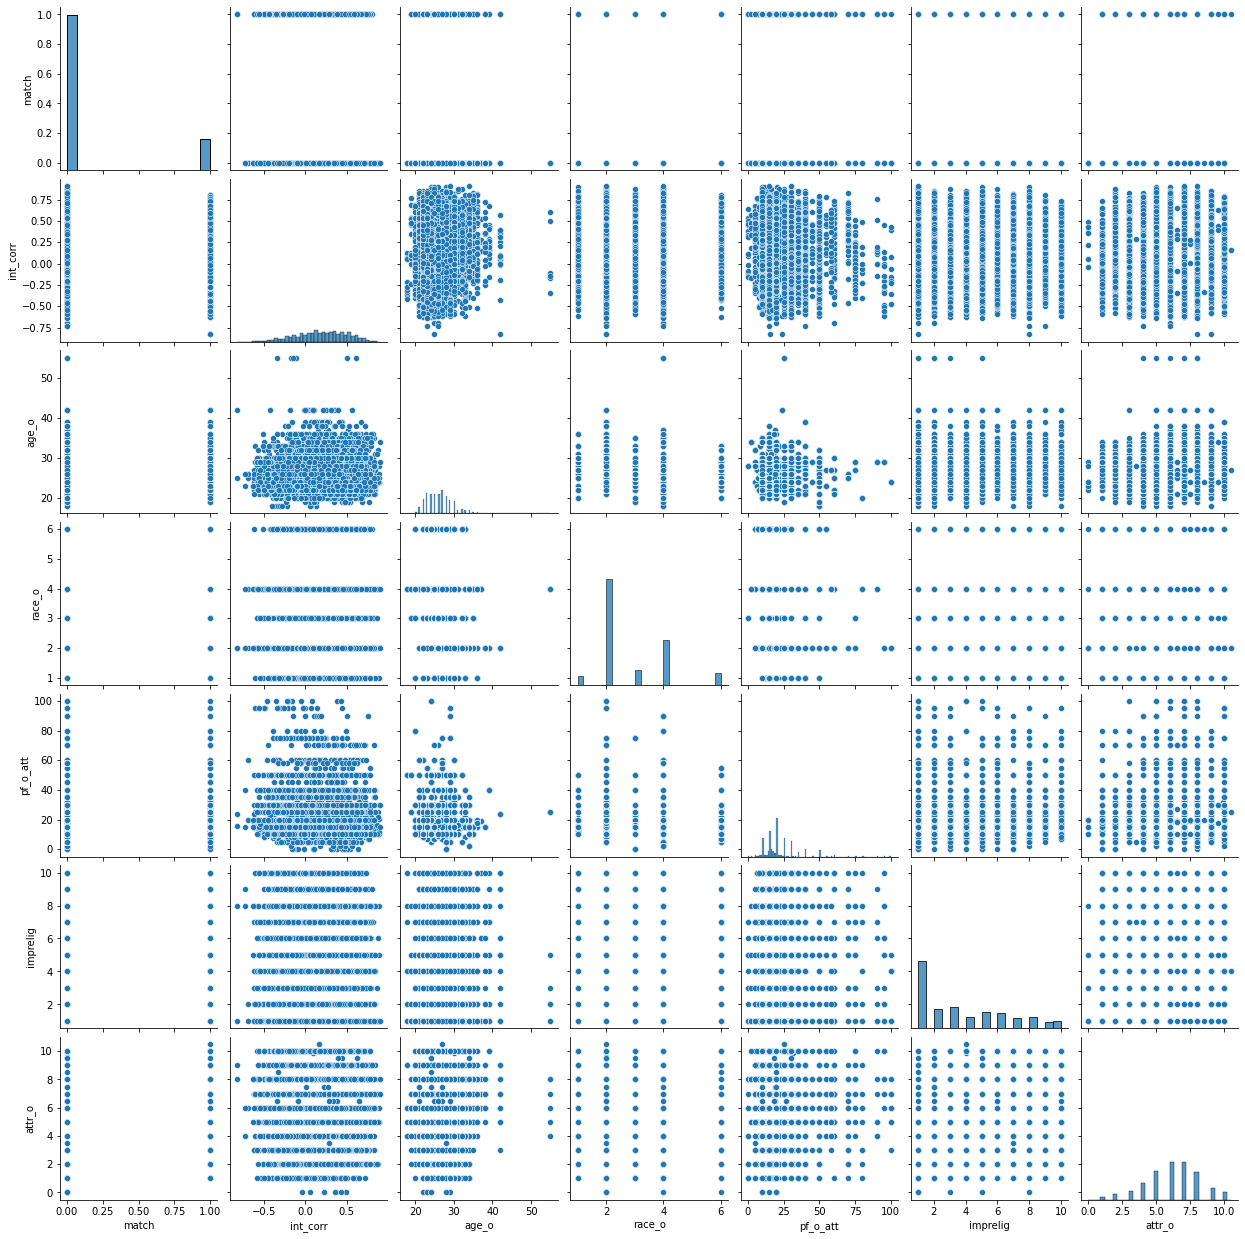

In [5]:
sns.pairplot(dfsub)
plt.show()

In [6]:
corr = dfsub[['match', 'int_corr', 'age_o', 'race_o', 'pf_o_att', 'imprelig', 'attr_o']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr


,match,int_corr,age_o,race_o,pf_o_att,imprelig,attr_o
match,1.000000,0.030161,-0.037652,-0.014031,0.015593,-0.027466,0.257099
int_corr,0.030161,1.000000,0.089298,-0.029164,-0.086482,-0.050341,0.016124
age_o,-0.037652,0.089298,1.000000,-0.052881,0.032459,0.033290,0.036943
race_o,-0.014031,-0.029164,-0.052881,1.000000,-0.051135,-0.021161,-0.011455
pf_o_att,0.015593,-0.086482,0.032459,-0.051135,1.000000,0.065003,0.022185
imprelig,-0.027466,-0.050341,0.033290,-0.021161,0.065003,1.000000,-0.030937
attr_o,0.257099,0.016124,0.036943,-0.011455,0.022185,-0.030937,1.000000


I used a heatmap as a second way to display correlation between the variables. attr_o seems to be very strongly correlated, which is the value for 'rating by partner the night of the event, for all 6 attributes.'

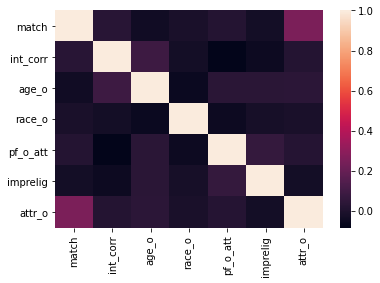

In [7]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()


By using a knn algorithm, we can predict a match based on the matches (values) that are closest to the one we are trying to predict. Based on those outcomes, the algorithm decides on an answer.

To make sure we don't overfit our data, we will split it into test/training data. 

In [8]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.
from sklearn.model_selection import train_test_split

X = dfsub[['int_corr', 'age_o', 'race_o', 'pf_o_att', 'imprelig', 'attr_o']] #all values that we want to use as influence go here
X = normalize(X) #normalize the matrix to put everything on the same scale
y = dfsub['match'] #create the y-variable, match in this case, as this is the independent we are trying to predict.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [9]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=7) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.803251354731138

This means 80% of predictions are correct, which seems high but is not an exceptional score, as the 'no match' category is already 80% of the total matches. Meaning guessing no on all matches would give you the same score.

In [10]:
df['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

To calculate accuracy, precision and recall, we need to make a confusion matrix. 

In [11]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[1893,   84],
       [ 388,   34]], dtype=int64)

To see the correct labels of the confusion matrix, we can use the method classes_, this shows us what is what. by the looks of it, no match comes first, match comes second.

In [12]:
knn.classes_

array([0, 1], dtype=int64)

To improve readability, we put the confusion matrix in a dataframe.


In [13]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['No_match', 'Match'], columns = ['P_no_match', 'P_match',]) 
conf_matrix

,P_no_match,P_match
No_match,1893,84
Match,388,34


By deviding the predictions, we can see the algorithm is wrong quite often, with a score of 0.42% correct.

In [14]:
50/118 

0.423728813559322

We're now employing a classification function to calculate recall and precision.

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1977
           1       0.29      0.08      0.13       422

    accuracy                           0.80      2399
   macro avg       0.56      0.52      0.51      2399
weighted avg       0.73      0.80      0.75      2399



The precision for matches is not superb, it scores a 0.29, meaning 71% of predicted matches are not actually matches at all.
The recall is extremely low, which means 0.92% of matches are not registered as matches.

Overall, the prediction seemed to work much better than it eventually did. It is still a tricky business to predict dating matches, as many factors are super subjective and based purely on undefinable factors such as feelings, attraction etc. 
The results might be better with different, or all values included, instead of the 7 I picked based on prior knowledge (being no expert. 